#HW #3
## GitHub Link: https://github.com/garcimat/EE399/branches

###Part 1:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D

# Load the digit dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1)).T

# 1.
# Perform SVD analysis
U, s, Vt = np.linalg.svd(X, full_matrices=False)
V = Vt.T
S = np.diag(s)

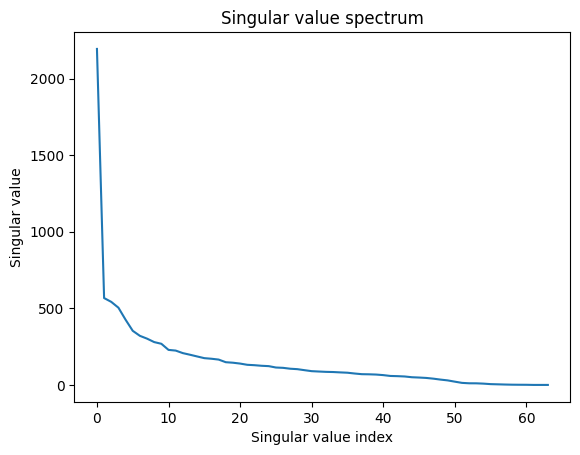

The rank of the digit space is: 61


In [16]:
# 2.
# Visualize singular value spectrum
plt.plot(s)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Singular value spectrum')
plt.show()

# Determine the rank of the digit space
r = np.sum(s > 1e-10)
print('The rank of the digit space is:', r)

In [17]:
# 3.
# Interpretations of U, S, and V matrices
# U: the left singular vectors, which represent the image space
# S: the singular values, which represent the importance of each singular vector
# V: the right singular vectors, which represent the feature space

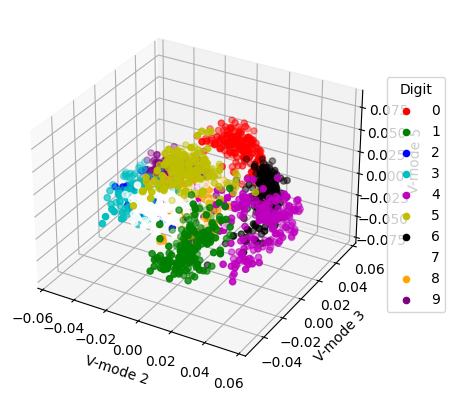

In [18]:
# 4.
# Project onto three selected V-modes (columns) colored by their digit label on a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']  # Define colors for each digit
for digit in range(10):
    idx = digits.target == digit
    ax.scatter(V[idx, 1], V[idx, 2], V[idx, 4], c=colors[digit], label=str(digit))
plt.legend(title='Digit', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('V-mode 2')
ax.set_ylabel('V-mode 3')
ax.set_zlabel('V-mode 5')
plt.show()

###Part 2:

In [19]:
# 1.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select only the digits 1 and 4 from the dataset
X = digits.data[(digits.target == 1) | (digits.target == 4)]
y = digits.target[(digits.target == 1) | (digits.target == 4)]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LinearDiscriminantAnalysis object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Using Digits 1 & 4:", accuracy)

Accuracy Using Digits 1 & 4: 0.963302752293578


In [20]:
# 2. 
# Select only the digits 3, 5, and 8 from the dataset
X = digits.data[(digits.target == 3) | (digits.target == 5) | (digits.target == 8)]
y = digits.target[(digits.target == 3) | (digits.target == 5) | (digits.target == 8)]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LinearDiscriminantAnalysis object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Using Digits 3, 5, & 8:", accuracy)

Accuracy Using Digits 3, 5, & 8: 0.9814814814814815


In [22]:
# 3 & 4.

# // Hardest to Distinguish: Digits 1 & 8 \\
# // Easiest to Distinguish: Digits 0 & 1 \\

from itertools import combinations

# Get all possible pairs of digits
digit_pairs = combinations(range(10), 2)

# Train and test a classifier for each pair of digits
for pair in digit_pairs:
    # Select only the two digits in the pair from the dataset
    X = digits.data[(digits.target == pair[0]) | (digits.target == pair[1])]
    y = digits.target[(digits.target == pair[0]) | (digits.target == pair[1])]
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Create a LinearDiscriminantAnalysis object
    lda = LinearDiscriminantAnalysis()
    
    # Fit the LDA model to the training data
    lda.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = lda.predict(X_test)
    
    # Evaluate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the pair of digits and the accuracy of the classifier
    print("Digits:", pair)
    print("Accuracy:", accuracy)
    print()

Digits: (0, 1)
Accuracy: 1.0

Digits: (0, 2)
Accuracy: 1.0

Digits: (0, 3)
Accuracy: 1.0

Digits: (0, 4)
Accuracy: 1.0

Digits: (0, 5)
Accuracy: 1.0

Digits: (0, 6)
Accuracy: 1.0

Digits: (0, 7)
Accuracy: 1.0

Digits: (0, 8)
Accuracy: 1.0

Digits: (0, 9)
Accuracy: 1.0

Digits: (1, 2)
Accuracy: 0.9907407407407407

Digits: (1, 3)
Accuracy: 0.990909090909091

Digits: (1, 4)
Accuracy: 0.963302752293578

Digits: (1, 5)
Accuracy: 1.0

Digits: (1, 6)
Accuracy: 0.9908256880733946

Digits: (1, 7)
Accuracy: 1.0

Digits: (1, 8)
Accuracy: 0.9345794392523364

Digits: (1, 9)
Accuracy: 0.9908256880733946

Digits: (2, 3)
Accuracy: 1.0

Digits: (2, 4)
Accuracy: 1.0

Digits: (2, 5)
Accuracy: 1.0

Digits: (2, 6)
Accuracy: 1.0

Digits: (2, 7)
Accuracy: 1.0

Digits: (2, 8)
Accuracy: 1.0

Digits: (2, 9)
Accuracy: 1.0

Digits: (3, 4)
Accuracy: 0.990909090909091

Digits: (3, 5)
Accuracy: 0.9818181818181818

Digits: (3, 6)
Accuracy: 1.0

Digits: (3, 7)
Accuracy: 1.0

Digits: (3, 8)
Accuracy: 0.9722222222222222

In [27]:
# 5.1.

# // SVM \\

from sklearn.svm import SVC

# Load the digit dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train an SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Test the classifier and print the accuracy score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Using SVM (10 digits): {accuracy}")

Accuracy Using SVM (10 digits): 0.9740740740740741


In [28]:
# 5.2.

# // Decision Tree Classifier \\

from sklearn.tree import DecisionTreeClassifier

# Load the digit dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Test the classifier and print the accuracy score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Using DTC (10 digits): {accuracy}")

Accuracy Using DTC (10 digits): 0.825925925925926


In [29]:
# 5.3. 

# // LDA \\

# Select all 10 digits from the dataset
X = digits.data[(digits.target == 1) | (digits.target == 2) | (digits.target == 3) | (digits.target == 4) | (digits.target == 5) | (digits.target == 6) | (digits.target == 7) | (digits.target == 8) | (digits.target == 9)]
y = digits.target[(digits.target == 1) | (digits.target == 2) | (digits.target == 3) | (digits.target == 4) | (digits.target == 5) | (digits.target == 6) | (digits.target == 7) | (digits.target == 8) | (digits.target == 9)]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LinearDiscriminantAnalysis object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Using LDA (10 digits):", accuracy)

Accuracy Using LDA (10 digits): 0.9547325102880658


In [37]:
# 6.
# Load the digit dataset and select digits 1 and 8
X_18 = digits.data[(digits.target == 1) | (digits.target == 8)]
y_18 = digits.target[(digits.target == 1) | (digits.target == 8)]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_18, y_18, test_size=0.3, random_state=42)

# Train an LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Train a Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Test the classifiers and print the accuracy scores
y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"LDA Accuracy: {accuracy_lda}")

y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

y_pred_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Decision Tree Accuracy: {accuracy_dtc}")

LDA Accuracy: 0.9345794392523364
SVM Accuracy: 0.9439252336448598
Decision Tree Accuracy: 0.9065420560747663
